<a href="https://colab.research.google.com/github/Animesh26526/Email-Spam-Detection-Model/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/emails.csv')

In [5]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


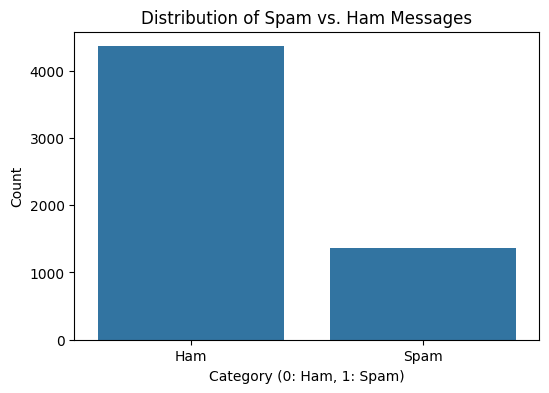

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=dataset)
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Category (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

In [9]:
X_train_text, X_test_text, y_train, y_test = train_test_split(dataset['text'], dataset['spam'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
yPred = model.predict(X_test)
accuracy = accuracy_score(y_test, yPred)
print(accuracy)

0.987783595113438


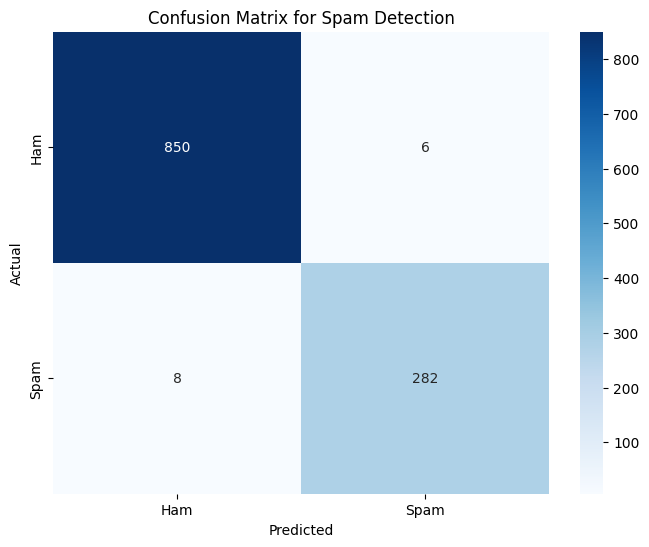

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, yPred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Spam Detection')
plt.show()

In [13]:
from sklearn.metrics import classification_report
report = classification_report(y_test, yPred, target_names=['Ham', 'Spam'])
print(report)

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       856
        Spam       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [14]:
def predictMessage(message):
  messageVector = vectorizer.transform([message])
  prediction = model.predict(messageVector)
  return 'Spam' if prediction[0] == 1 else 'Ham'

In [15]:
userMessage = input("Enter text to Predict:")
prediction = predictMessage(userMessage)
print(f"The Message is {prediction}")

Enter text to Predict:Hey! Wanna buy an IPhone. Get best deals with additional discounts here! 
The Message is Spam
